In [1]:
# Author Andy Webber andygwebber@yahoo.com

import pandas as pd
import numpy as np
from sklearn.linear_model import LinearRegression
import statistics
import matplotlib.pyplot as plt
import os
import sys
from scipy.sparse import diags, eye, kron
from scipy.sparse.linalg import spsolve

In [2]:
def whittaker_smooth_1d(y, lambda_smooth=1e2):
    """
    Perform 1D Whittaker smoothing on a 1D array (vector).

    Parameters:
        y (np.ndarray): The 1D array to smooth.
        lambda_smooth (float): Smoothing parameter. Higher values give more smoothing.

    Returns:
        np.ndarray: The smoothed 1D array.
    """
    n = len(y)
    # Construct the difference matrix
    D = diags([1, -2, 1], [0, 1, 2], shape=(n - 2, n))
    penalty_matrix = D.T @ D

    # Solve the smoothing equation
    smoothed_y = spsolve(eye(n) + lambda_smooth * penalty_matrix, y)
    return smoothed_y

def whittaker_smooth_2d_separable(data, lambda_smooth=1e2):
    """
    Perform separable 2D Whittaker smoothing on a 2D array.

    Parameters:
        data (np.ndarray): The 2D array (image or grid data) to smooth.
        lambda_smooth (float): Smoothing parameter. Higher values give more smoothing.

    Returns:
        np.ndarray: The smoothed 2D array.
    """
    # Smooth each row
    smoothed_rows = np.apply_along_axis(whittaker_smooth_1d, axis=1, arr=data, lambda_smooth=lambda_smooth)
    
    # Smooth each column on the result
    smoothed_data = np.apply_along_axis(whittaker_smooth_1d, axis=0, arr=smoothed_rows, lambda_smooth=lambda_smooth)
    
    return smoothed_data

In [13]:
nmax = 59
mmax = 48
k1 = np.linspace(0,(mmax-1)/2, mmax)
k3 = np.linspace(0,nmax-1, nmax)
K1, K3 = np.meshgrid(k1, k3)
production = np.loadtxt("production.txt", delimiter=" ")
diffusion = np.loadtxt("diffusion.txt", delimiter=" ")
growth = np.loadtxt("growth.txt", delimiter=" ")

Text(0.5, 1.0, 'Production rate of most energetic eigenfunction in each wave index pair')

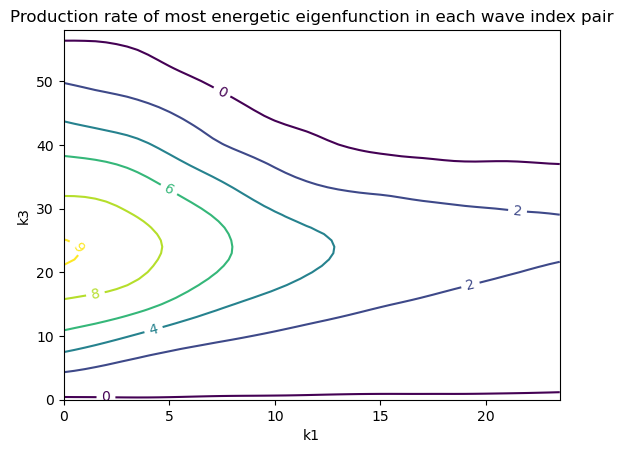

In [14]:
# Perform Whittaker smoothing
lambda_smooth = 10

smoothed_production = whittaker_smooth_2d_separable(production, lambda_smooth=lambda_smooth)
# Define specific contour levels
contour_levels = [0, 2, 4, 6, 8, 9]

fig, ax = plt.subplots()
cnt = ax.contour(K1, K3, smoothed_production, levels=contour_levels)
ax.clabel(cnt, cnt.levels, inline = True, fontsize = 10)

plt.xlabel("k1")
plt.ylabel("k3")
plt.title("Production rate of most energetic eigenfunction in each wave index pair")

Text(0.5, 1.0, 'Diffusion rate of most energetic eigenfunction in each wave index pair')

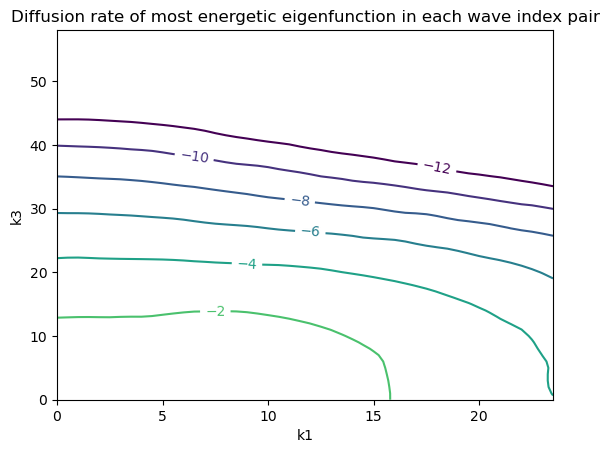

In [16]:
# Perform Whittaker smoothing
lambda_smooth = 1
#smoothed_Isum = whittaker_smooth_2d(Isum, lambda_smooth=lambda_smooth)
smoothed_diffusion = whittaker_smooth_2d_separable(diffusion, lambda_smooth=lambda_smooth)

# Define specific contour levels
contour_levels = [-12, -10, -8, -6, -4, -2, 0, 2]

fig, ax = plt.subplots()
cnt = ax.contour(K1, K3, smoothed_diffusion, levels=contour_levels)
ax.clabel(cnt, cnt.levels, inline = True, fontsize = 10)

plt.xlabel("k1")
plt.ylabel("k3")
plt.title("Diffusion rate of most energetic eigenfunction in each wave index pair")

Text(0.5, 1.0, 'Growth rates of most energetic eigenfunction in each wave index pair')

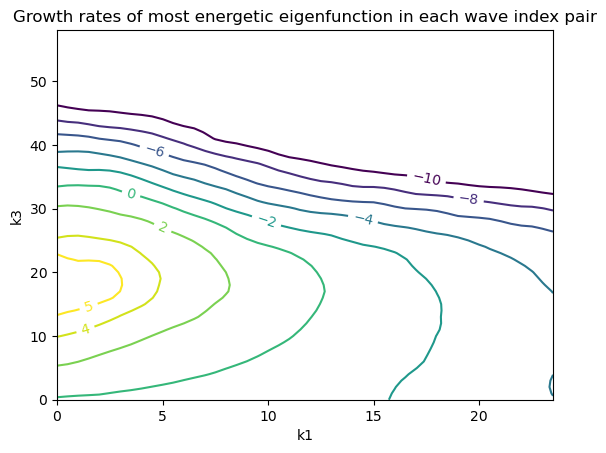

In [18]:
# Perform Whittaker smoothing
lambda_smooth = 1
smoothed_growth = whittaker_smooth_2d_separable(growth, lambda_smooth=lambda_smooth)

# Define specific contour levels
contour_levels = [-10, -8, -6, -4, -2, 0, 2, 4, 5]

fig, ax = plt.subplots()
cnt = ax.contour(K1, K3, smoothed_growth, levels=contour_levels)
ax.clabel(cnt, cnt.levels, inline = True, fontsize = 10)
# Label the axes
plt.xlabel("k1")
plt.ylabel("k3")
plt.title("Growth rates of most energetic eigenfunction in each wave index pair")

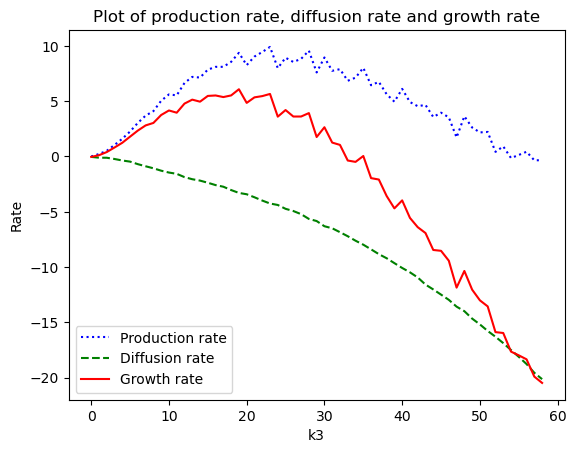

In [21]:
production_1d = production[:,0]
diffusion_1d = diffusion[:,0]
growth_1d = growth[:,0]

# Plot each function with different styles
plt.plot(k3, production_1d, label="Production rate", color="blue", linestyle=":")
plt.plot(k3, diffusion_1d, label="Diffusion rate", color="green", linestyle="--")
plt.plot(k3, growth_1d, label="Growth rate", color="red", linestyle="-")

# Add labels and title
plt.xlabel("k3")
plt.ylabel("Rate")
plt.title("Plot of production rate, diffusion rate and growth rate")

# Add a legend to distinguish the functions
plt.legend()